In [154]:
!nvidia-smi

Sat Oct 29 06:28:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    28W /  70W |   2946MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [82]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as pltcol
import tensorflow as tf
import keras
import PIL
from PIL import Image

# **EXTRACTING IMAGES FROM TRAINING FOLDER AND CONVERTING INTO TRAINING ARRAY DATASET**

In [5]:
train_path='/content/drive/MyDrive/Colab Notebooks/DATASETS/Rock-Paper-Scissors/train'

In [6]:
train_folders=[]
for fol in os.listdir(train_path):
  train_folders.append(fol)

print(type(train_folders))

<class 'list'>


**EXTRACTING ROCK IMAGES**

In [7]:
rock_path=train_path+'/rock'
rock_images=os.listdir(rock_path)
x_train_rock=[]
for file in rock_images:
  img_path=rock_path+'/'+file
  img=plt.imread(img_path)
  img=cv2.resize(img,(64,64))
  img_2d=np.array(img)
  x_train_rock.append(img_2d)

len(x_train_rock)

840

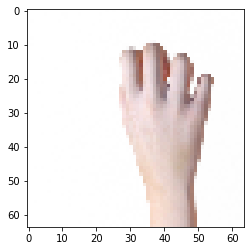

In [8]:
plt.imshow(x_train_rock[5])

**EXTRACTING PAPER IMAGES**

In [9]:
paper_path=train_path+'/paper'
paper_images=os.listdir(paper_path)
x_train_paper=[]

for file in paper_images:
  img_path=paper_path+'/'+file
  img=plt.imread(img_path)
  img=cv2.resize(img,(64,64))
  img_2d=np.array(img)
  x_train_paper.append(img_2d)

len(x_train_paper)

840

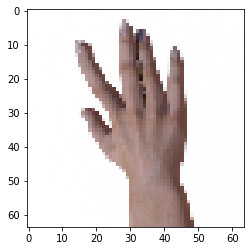

In [10]:
plt.imshow(x_train_paper[5])

**EXTRACTING SCISSORS IMAGES**

In [11]:
scissors_path=train_path+'/scissors'
scissors_images=os.listdir(scissors_path)
x_train_scissors=[]

for file in scissors_images:
  img_path=scissors_path+'/'+file
  img=plt.imread(img_path)
  img=cv2.resize(img,(64,64))
  img_2d=np.array(img)
  x_train_scissors.append(img_2d)

len(x_train_scissors)

840

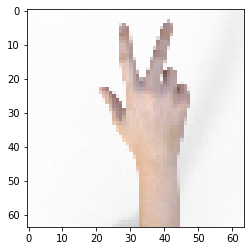

In [12]:
plt.imshow(x_train_scissors[5])

In [13]:
x_train=x_train_rock+x_train_paper+x_train_scissors
x_train=np.array(x_train)

In [14]:
x_train.shape

(2520, 64, 64, 4)

**CREATING TRAINING LABELS**

In [15]:
y_train=np.empty(2520)
for i in range(0,840):
    y_train[i] = 0

for i in range(840,1680):
    y_train[i] = 1

for i in range(1680,2520):
    y_train[i] = 2


In [16]:
y_train.shape

(2520,)

0.0

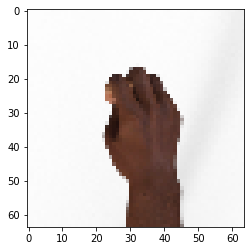

In [17]:
plt.imshow(x_train[839])
y_train[839]

# **EXTRACTING IMAGES FROM TESTING FOLDER AND CONVERTING INTO TESTING ARRAY DATASET**

In [18]:
test_path='/content/drive/MyDrive/Colab Notebooks/DATASETS/Rock-Paper-Scissors/test'

In [19]:
test_folders=[]

for fol in os.listdir(test_path):
  test_folders.append(fol)

test_folders

['rock', 'scissors', 'paper']

**EXTRACTING ROCK IMAGES**

In [20]:
rock_path=test_path+'/rock'
rock_images=os.listdir(rock_path)

x_test_rock=[]
for file in rock_images:
  img_path=rock_path+'/'+file
  img=plt.imread(img_path)
  img=cv2.resize(img,(64,64))
  img2d=np.array(img)
  x_test_rock.append(img2d)

len(x_test_rock)

124

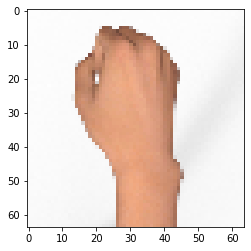

In [21]:
plt.imshow(x_test_rock[5])

**EXTRACTING PAPER SCISSORS**

In [22]:
paper_path=test_path+'/paper'
paper_images=os.listdir(paper_path)

x_test_paper=[]
for file in paper_images:
  img_path=paper_path+'/'+file
  img=plt.imread(img_path)
  img=cv2.resize(img,(64,64))
  img_2d=np.array(img)
  x_test_paper.append(img_2d)

len(x_test_paper)

124

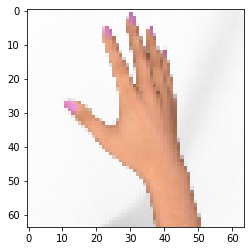

In [23]:
plt.imshow(x_test_paper[5])

**EXTRACTING SCISSORS IMAGES**

In [24]:
scissors_path=test_path+'/scissors'
scissors_images=os.listdir(scissors_path)

x_test_scissors=[]
for file in scissors_images:
  img_path=scissors_path+'/'+file
  img=plt.imread(img_path)
  img=cv2.resize(img,(64,64))
  img_2d=np.array(img)
  x_test_scissors.append(img_2d)

len(x_test_scissors)

124

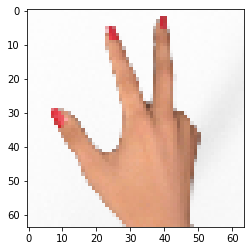

In [25]:
plt.imshow(x_test_scissors[5])

In [26]:
x_test=x_test_rock+x_test_paper+x_test_scissors
x_test=np.array(x_test)

In [27]:
x_test.shape

(372, 64, 64, 4)

**CREATING TRAINING LABELS**

In [28]:
y_test=np.empty(372)

for i in range(0,124):
  y_test[i]=0
  y_test[i+124]=1
  y_test[i+248]=2

2.0

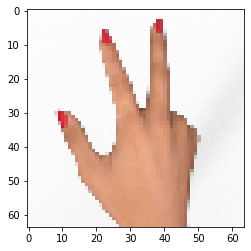

In [29]:
plt.imshow(x_test[248])
y_test[248]

# **CREATING NEURAL NETWORK USING CNN AND TRAINING MODEL**

In [30]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [31]:
# x_train=x_train/255.0
# x_test=x_test/255.0

In [32]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(2520, 64, 64, 4) (2520, 3)
(372, 64, 64, 4) (372, 3)


In [178]:
model=keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(64,64,4)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(256,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dense(3,activation='softmax')
])

In [179]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 62, 62, 32)        1184      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 6, 6, 128)      

In [180]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [181]:
model.fit(x_train,y_train,epochs=10,batch_size=50)

Epoch 1/10
51/51 [==============================] - 1s 13ms/step - loss: 0.6962 - accuracy: 0.6627
Epoch 2/10
51/51 [==============================] - 1s 11ms/step - loss: 0.0701 - accuracy: 0.9758
Epoch 3/10
51/51 [==============================] - 1s 11ms/step - loss: 0.0133 - accuracy: 0.9944
Epoch 4/10
51/51 [==============================] - 1s 12ms/step - loss: 0.0216 - accuracy: 0.9937
Epoch 5/10
51/51 [==============================] - 1s 11ms/step - loss: 0.0054 - accuracy: 0.9976
Epoch 6/10
51/51 [==============================] - 1s 10ms/step - loss: 0.0344 - accuracy: 0.9881
Epoch 7/10
51/51 [==============================] - 1s 10ms/step - loss: 0.0064 - accuracy: 0.9976
Epoch 8/10
51/51 [==============================] - 1s 10ms/step - loss: 5.7819e-04 - accuracy: 1.0000
Epoch 9/10
51/51 [==============================] - 0s 10ms/step - loss: 9.4946e-05 - accuracy: 1.0000
Epoch 10/10
51/51 [==============================] - 0s 10ms/step - loss: 7.8238e-05 - accuracy: 1.00

In [182]:
model.evaluate(x_test,y_test)

12/12 [==============================] - 0s 6ms/step - loss: 0.0454 - accuracy: 0.9677


[0.045375172048807144, 0.9677419066429138]

# **VALIDATING MY MODEL WITH SELF CLICKED PICTURES OF ROCK PAPER & SCISSORS**

In [143]:
from google.colab import files
uploaded=files.upload()

file=""
for fn in uploaded.keys():
  file=fn

Saving scissors.jpeg to scissors.jpeg


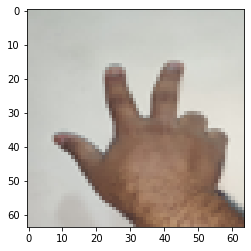

In [144]:
img=Image.open(file).convert('RGBA')
img=img.resize((64,64))
plt.imshow(img)

In [145]:
img_2d=np.array(img)
img_2d=img_2d.reshape(-1,64,64,4)

In [146]:
res=model.predict(img_2d)
res=np.round_(res)
res=res.reshape(3)
human=0
for i in res :
  if i==1:
    break
  human+=1
  
if human==0:
  print("Rock !!!")
elif human==1:
  print("Paper !!!")
else:
  print("Scissors !!!")


1/1 [==============================] - 0s 17ms/step
Scissors !!!


# **Rock Paper Scissors Game**

In [151]:
import random
computer=random.randint(0,2)
if(computer==0 and human==1):
  print('Rock from computer side !!!')
  print('Paper from your side !!!')
  print('You Win 🥳🥳🥳')

elif(computer==0 and human==2):
  print('Rock from computer side !!!')
  print('Scissors from your side !!!')
  print('Computer Wins 🥲🥲🥲')

elif(computer==1 and human==0):
  print('Paper from computer side !!!')
  print('Rock from your side !!!')
  print('Computer Wins 🥲🥲🥲')

elif(computer==1 and human==2):
  print('Paper from computer side !!!')
  print('Scissors from your side !!!')
  print('You Win 🥳🥳🥳')

elif(computer==2 and human==0):
  print('Scissors from computer side !!!')
  print('Rock from your side !!!')
  print('You Win 🥳🥳🥳')

elif(computer==2 and human==1):
  print('Scissors from computer side !!!')
  print('Paper from your side !!!')
  print('Computer Wins 🥲🥲🥲')

else:
  print('Draw 😶‍🌫️😶‍🌫️😶‍🌫️')


Paper from computer side !!!
Scissors from your side !!!
You Win 🥳🥳🥳
